In [1]:
# Required Packages

import numpy as np
import pandas as pd

# Display
from colorama import Fore, Back, Style

# Plots

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.gridspec as gridspec

# sns setting
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})
sns.set_style("whitegrid")

# plt setting
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Movie Recommendation System

* [Data](#Data)
    * [Movie Ratings](#Movie-Ratings)
    * [Movie titles and their IDs](#Movie-titles-and-their-IDs)
* [Data Analysis](#Data-Analysis)
* [Developing a Recommender Function](#Developing-a-Recommender-Function)
* [Conclusions and Movie Recommendations](#Conclusions-and-Movie-Recommendations)

In this article, a recommender system is developed that suggests similar movies based on available data.

## Data

There are two sets of data that we will be using in this article.

### Movie Ratings

In [2]:
#Reading the movie ratings dataset.
movie_ratings_df = pd.read_csv('Data/movie_ratings.csv', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
display(movie_ratings_df.head().style.hide_index())

user_id,item_id,rating,timestamp
0,50,5,881250949
0,172,5,881250949
0,133,1,881250949
196,242,3,881250949
186,302,3,891717742


### Movie titles and their IDs

Reading the movie titles and their IDs

In [3]:
movie_titles_df = pd.read_csv("Data/movie_id_titles.csv")
display(movie_titles_df.head().style.hide_index())

item_id,title
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)


Merging the the two dataframes:

In [4]:
df = pd.merge(movie_ratings_df, movie_titles_df, on='item_id')
# modifying the column names
Temp = df.columns.tolist()
Temp = [x.title() for x in Temp]
Temp = [x.replace('Id','ID') for x in Temp]
df.columns = Temp
del Temp
display(df.head().style.hide_index())

User_ID,Item_ID,Rating,Timestamp,Title
0,50,5,881250949,Star Wars (1977)
290,50,5,880473582,Star Wars (1977)
79,50,4,891271545,Star Wars (1977)
2,50,5,888552084,Star Wars (1977)
8,50,5,879362124,Star Wars (1977)


## Data Analysis

Exploring the data to identify at some of the best-rated movies. In doing so, the data frame can be grouped by **movie titles** and their **ratings**. It follows that,

In [5]:
Ratings = pd.merge(pd.DataFrame(df.groupby(['Title'])['Rating'].mean()).reset_index(),
         pd.DataFrame(df.groupby(['Title'])['Rating'].count()).reset_index(), on = 'Title')
Ratings.columns =  ['Title', 'Average Rating', 'Number of Ratings']
display(Ratings.sort_values(by=['Number of Ratings'],ascending=False).head().style.hide_index())

Title,Average Rating,Number of Ratings
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Visualizing the number of ratings:

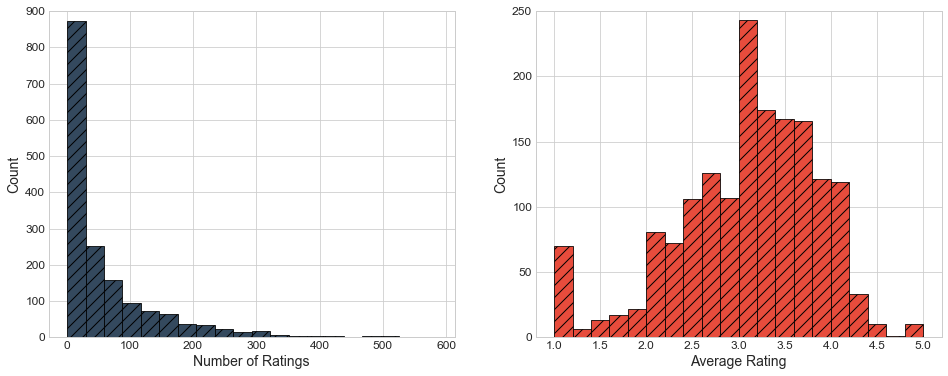

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=False)
# Left Plot
_ = Ratings['Number of Ratings'].hist(bins=20, ax=ax[0], color='#34495e', edgecolor='k', hatch = '//')
_ = ax[0].set_ylim([0, 9e2])
_ = ax[0].set_xlabel('Number of Ratings')
_ = ax[0].set_ylabel('Count')
# Right Plot
_ = Ratings['Average Rating'].hist(bins=20, ax=ax[1], color='#e74c3c', edgecolor='k', hatch = '//')
_ = ax[1].set_ylim([0, 250])
_ = ax[1].set_xlabel('Average Rating')
_ = ax[1].set_ylabel('Count')

## Recommending Similar Movies

The next step is to create a matrix that has the user ids on one axis and the movie titles on another. Each cell will then consist of the rating of a movie by a particular user. For this purpose, we use ```pivot_table``` function (see this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) for more details).

In [7]:
Movie_Matrix = df.pivot_table(index='User_ID', columns='Title', values='Rating')
Movie_Matrix.head()

Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_ID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since users might have not watched all movies (only some movies), some of these values appear as **<font color='Blue'>NaN</font>**.

Checking out the top ten movies that have a rating greater than 4.0 and have the most rated numbers.

In [8]:
Top_Ratings = Ratings[Ratings['Average Rating'] > 4.0].sort_values('Number of Ratings',ascending=False)
Top_list = list(Top_Ratings.Title) 
Top = 10
print(Back.CYAN + "The Top %i by Average Rating:" % Top)
print(Style.RESET_ALL)
# 
display(Top_Ratings.head(Top).style.hide_index())

The Top 10 by Average Rating:



Title,Average Rating,Number of Ratings
Star Wars (1977),4.359589,584
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Raiders of the Lost Ark (1981),4.252381,420
"Godfather, The (1972)",4.283293,413
Pulp Fiction (1994),4.060914,394
"Silence of the Lambs, The (1991)",4.289744,390
"Empire Strikes Back, The (1980)",4.206522,368
Titanic (1997),4.245714,350
"Fugitive, The (1993)",4.044643,336


## Developing a Recommender Function

In doing so, consider a movie title, for example,

In [9]:
Movie = Top_list[0]
print(Back.YELLOW +'"%s":' % Movie)

"Star Wars (1977)":


Now let's consider the user ratings for this movie

In [10]:
Temp = Movie_Matrix[Movie]

We can then use [**corrwith()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html) method to get correlations between two pandas series:

In [11]:
similar_to_movie = Movie_Matrix.corrwith(Temp)
similar_to_movie

Title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

Cleaning the data by removing **Nan** values and using a DataFrame instead.

In [12]:
df_movie_corr = pd.DataFrame(similar_to_movie,columns=['Correlation']).reset_index(drop = False)
df_movie_corr.dropna(inplace=True)
print('Ten similar movies to "%s":' % Top_list[0])
df_movie_corr.sort_values('Correlation',ascending=False).head(10).style.hide_index()

Ten similar movies to "Star Wars (1977)":


Title,Correlation
Hollow Reed (1996),1.000000
Stripes (1981),1.000000
Star Wars (1977),1.000000
Man of the Year (1995),1.000000
"Beans of Egypt, Maine, The (1994)",1.000000
Safe Passage (1994),1.000000
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.000000
"Outlaw, The (1943)",1.000000
"Line King: Al Hirschfeld, The (1996)",1.000000
Hurricane Streets (1998),1.000000


However, some of these movies only rated by a few users. In caste that we are only interested in movies that have a least 100 reviews. We have,

In [13]:
df_movie_corr = pd.merge(df_movie_corr,Ratings[['Title','Number of Ratings']] , on = 'Title')
df_movie_corr.head()

,Title,Correlation,Number of Ratings
0,'Til There Was You (1997),0.872872,9
1,1-900 (1994),-0.645497,5
2,101 Dalmatians (1996),0.211132,109
3,12 Angry Men (1957),0.184289,125
4,187 (1997),0.027398,41


Now sort the values and notice how the titles make a lot more sense:

In [14]:
df_movie_corr[df_movie_corr['Number of Ratings']>100].sort_values('Correlation',ascending=False).head()

,Title,Correlation,Number of Ratings
1192,Star Wars (1977),1.000000,584
397,"Empire Strikes Back, The (1980)",0.748353,368
1051,Return of the Jedi (1983),0.672556,507
1026,Raiders of the Lost Ark (1981),0.536117,420
91,Austin Powers: International Man of Mystery (1...,0.377433,130


We can come with a similar analysis for any other movies from the list. Therefore, we can summarize the results in the next section.

## Conclusions and Movie Recommendations

Based on the analysis, we can create the following function that recommends four similar movies to a movie that we just watched.

The following function recommends **N** movies similar to the **Inp** movie.

In [15]:
def Movie_Recommendations(Inp, N= 10, at_least= 100, Data = Movie_Matrix, Rate_df= Ratings):
    df_Movie = Data[Inp]
    Similar_Movies = Data.corrwith(df_Movie)
    Movie_corr = pd.DataFrame(Similar_Movies, columns=['Correlation'])
    Rate_df = Rate_df.set_index('Title')
    Movie_corr = Movie_corr.join(Rate_df['Number of Ratings'])
    Move_Rec=Movie_corr[Movie_corr['Number of Ratings']> at_least].sort_values('Correlation',ascending=False).head(N)
    Move_Rec_list=list(Move_Rec.index)
    print(Back.CYAN +'Ten similar movies to: "%s":' % Inp)
    return Move_Rec_list[1:]

For example, consider **Star Wars (1977)**. For this movie, the function recommends the following movies

In [16]:
Movie_Recommendations('Star Wars (1977)')

Ten similar movies to: "Star Wars (1977)":


['Empire Strikes Back, The (1980)',
 'Return of the Jedi (1983)',
 'Raiders of the Lost Ark (1981)',
 'Austin Powers: International Man of Mystery (1997)',
 'Sting, The (1973)',
 'Indiana Jones and the Last Crusade (1989)',
 'Pinocchio (1940)',
 'Frighteners, The (1996)',
 'L.A. Confidential (1997)']

Or for **Titanic (1997)** movie, we have

In [17]:
Movie_Recommendations('Titanic (1997)')

Ten similar movies to: "Titanic (1997)":


['River Wild, The (1994)',
 'Abyss, The (1989)',
 "Bram Stoker's Dracula (1992)",
 'True Lies (1994)',
 "William Shakespeare's Romeo and Juliet (1996)",
 'Last of the Mohicans, The (1992)',
 'Outbreak (1995)',
 'Die Hard (1988)',
 'Frighteners, The (1996)']

***